In [48]:
# Train two classifiers on 'make_moon' dataset using Decision Tree and SVM
# Calculate the MSE, Accuracy, Precision, Recall and ROC curves of the models used. 

# pandas 1.3.4
import pandas as pd

# numpy 1.21.3
import numpy as np

# scikitlearn 1.0.2
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


# matplotlib 3.5.1
import matplotlib
import matplotlib.pyplot as plt

# mlxtend 0.19.0
from mlxtend import plot_decision_regions


ModuleNotFoundError: No module named 'mlxtend'

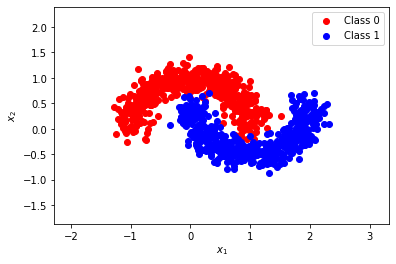

In [27]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state = 0)

plt.scatter(X[ y == 0, 0], X[ y == 0, 1], c='r', marker='o', label='Class 0')
plt.scatter(X[ y == 1, 0], X[ y == 1, 1], c='b', marker='o', label='Class 1')
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.show()

### K-Nearest Neighbours Classifier ###

[KNN]
Misclassified samples: 12
Accuracy: 0.94


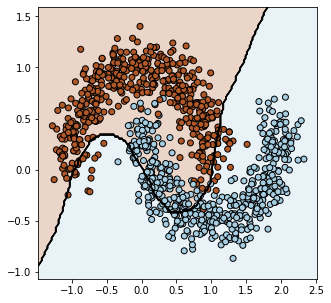

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# stack arrays
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

knn = KNeighborsClassifier(n_neighbors=101, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN]')
print("Misclassified samples: %d" % (y_test != y_pred).sum())
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier

def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolors='k')

plot_decision_boundary(knn, X, y)

# plot_decision_regions(X_combined_std, y_combined,
#                       classifier=knn, 
#                       test_idx=range(y_train.size,
#                                      y_train.size + y_test.size))
# plt.xlabel('$x_1$')
# plt.ylabel('$x_2$')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.savefig('./output/fig-two-moon-knn-boundray.png', dpi=300)
# plt.show()
